In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
data= pd.read_csv("german_credit.csv")
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
# Lets build a Ensemble model but need to modify the dataset first
X=data.drop(columns="default", axis=1)
y=data["default"]

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,1,0,1,0,0,1,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [36]:
# Print Shape of model data
X.shape

(1000, 48)

### Check for highly correlated variables but don't required any treatment for this use case

In [7]:
X.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
duration_in_month,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,-0.076455,-0.063467,...,0.212838,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-0.181203,0.164718,0.138196
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,-0.100510,-0.039485,...,0.248922,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-0.161757,0.276995,0.050050
installment_as_income_perc,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.041591,0.024961,...,0.044990,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-0.057237,0.014413,0.090024
present_res_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.064303,0.001985,...,0.188028,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,0.009065,0.095359,0.054097
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,0.037504,0.062436,...,0.206368,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,0.043712,0.145259,0.006151
credits_this_bank,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.040213,0.094435,...,-0.012850,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-0.010392,0.065553,0.009717
people_under_maintenance,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.008700,0.010914,...,0.077548,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,0.145066,-0.014753,-0.077071
account_check_status_< 0 DM,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.159297,-0.495358,...,0.048476,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,0.023542,-0.067149,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,1.000000,-0.209080,...,-0.008005,-0.002983,0.020206,0.018934,-0.035183,-0.022932,0.073347,0.014405,-0.028955,-0.036392
account_check_status_no checking account,-0.063467,-0.039485,0.024961,0.001985,0.062436,0.094435,0.010914,-0.495358,-0.209080,1.000000,...,-0.071871,0.048829,-0.005009,0.104407,-0.066870,0.075366,-0.079080,-0.045023,0.061825,0.017108


### Drop the original variables which are converted to dummy

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [9]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=2, random_state=9999)
Random_Forest=RFC.fit(X_train, y_train)

In [10]:
y_pred= RFC.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7366666666666667

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[190,  13],
       [ 66,  31]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [13]:
Random_Forest.feature_importances_

array([0.08130014, 0.11251984, 0.04034548, 0.03898386, 0.08888635,
       0.02119052, 0.01280486, 0.03852628, 0.00901771, 0.06495368,
       0.02216533, 0.00938288, 0.01546855, 0.01229916, 0.01188946,
       0.0202639 , 0.01166395, 0.01517549, 0.00355882, 0.00285475,
       0.01484885, 0.00143359, 0.00021647, 0.02369573, 0.00902476,
       0.0068845 , 0.01626869, 0.01994078, 0.01806236, 0.01457512,
       0.00925217, 0.01005163, 0.01108205, 0.01865429, 0.01082473,
       0.0128074 , 0.01803396, 0.01674017, 0.01406285, 0.0259528 ,
       0.00614468, 0.01607395, 0.01434623, 0.01809807, 0.0029906 ,
       0.01241349, 0.01966165, 0.00460742])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
# Use below values
num_folds = 10
seed = 77
KF= KFold(n_splits=10, random_state=77)

In [16]:
#Validate the Random Forest model build above using k fold
scores = cross_val_score(RFC, X_train, y_train, scoring='accuracy')

In [17]:
#Calculate Mean score
scores.mean()

0.7585961292857845

In [18]:
# Calculate score standard deviation using std()
scores.std()

0.006357199104652196

# Q8 Print the confusion matrix( 1 Marks)

In [19]:
confusion_matrix(y_test, y_pred)

array([[190,  13],
       [ 66,  31]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [20]:
from sklearn.metrics import classification_report
target_names = ['Not Default', 'Default']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Default       0.74      0.94      0.83       203
     Default       0.70      0.32      0.44        97

    accuracy                           0.74       300
   macro avg       0.72      0.63      0.63       300
weighted avg       0.73      0.74      0.70       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [25]:
#Hint: Use roc_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
probas_ = RFC.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

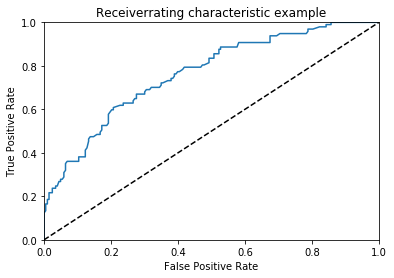

In [26]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [27]:
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.763496


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [28]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [29]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    RFC.fit(X_, y_)
    y_pred = RFC.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [30]:
accuracy = np.array(accuracy)
print('Accuracy Score: ', acc)
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score:  0.7433333333333333
Avearge:  0.7306666666666667
Standard deviation:  0.012092238098144702
